#### Preliminaries - import main libraries

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage import color, io, segmentation
from skimage.filters import threshold_otsu
from skimage import segmentation, graph
from skimage.future import graph

#### Import test image

In [2]:
# imported from url https://www.marinegeosolutions.com/data-examples.htm (which no longer exists)
img = np.asarray(io.imread('stuff4experiments/MBES_B.jpg'))[:,:,:3]

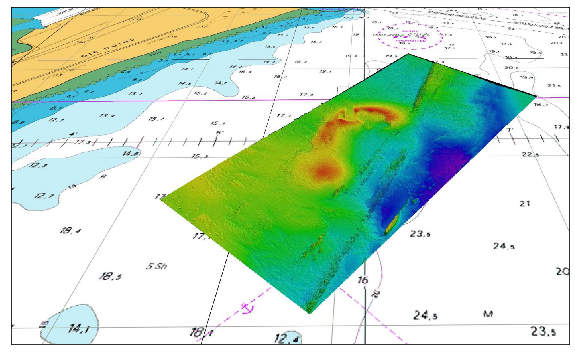

In [3]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(img,  interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

#### RAG thresholding

In [4]:
labels1 = segmentation.slic(img, compactness=50, n_segments=500)
out1 = color.label2rgb(labels1, img, kind='avg')

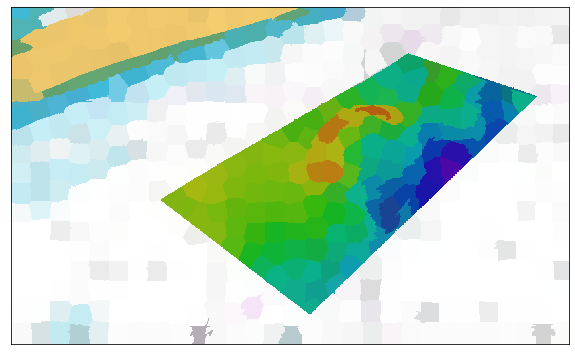

In [5]:
# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(out1, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

In [6]:
thresh =  min(np.shape(out1)[:1])/10
g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, thresh)
out2 = color.label2rgb(labels2, img, kind='avg')

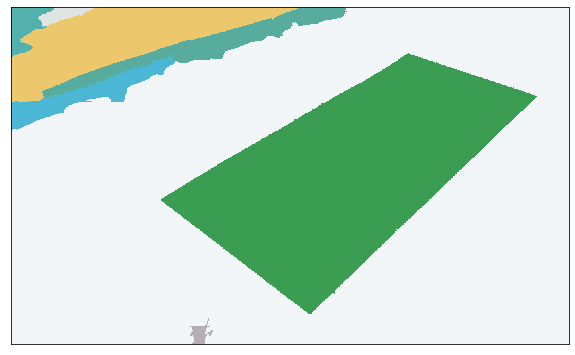

In [7]:
# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(out2, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

In [8]:
out2 = color.rgb2gray(out2);
global_thresh = threshold_otsu(out2)
binary = out2 < global_thresh

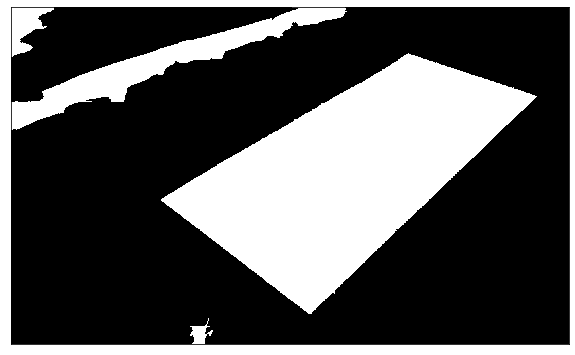

In [9]:
# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(binary, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);